<a href="https://colab.research.google.com/github/Lakshyadeepsingh18/Interndesire_projects/blob/main/sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load dataset
df = pd.read_csv('/content/sales_data_sample.csv', encoding='ISO-8859-1')

# Clean and preprocess
df.dropna(inplace=True)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df.dropna(subset=['ORDERDATE'], inplace=True)

# Encode categorical
features = [
    'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
    'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'DEALSIZE'
]
target = 'SALES'

label_encoders = {}
for col in ['PRODUCTLINE', 'DEALSIZE']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Train models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))
    print(f'{name} -> RMSE: {rmse:.2f}, R²: {r2:.2f}')



Linear Regression -> RMSE: 831.24, R²: 0.82
Decision Tree -> RMSE: 808.85, R²: 0.83
Random Forest -> RMSE: 618.30, R²: 0.90


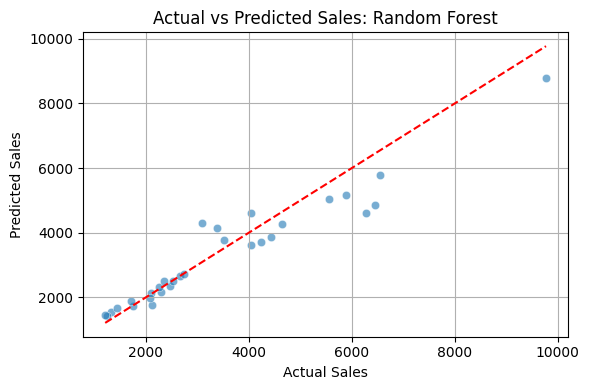

In [ ]:
 # Scatter plot: Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.title(f'Actual vs Predicted Sales: {name}')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect fit line
plt.tight_layout()
plt.show()



/tmp/ipython-input-16-3098510710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_df, palette='Blues_d')
/tmp/ipython-input-16-3098510710.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_df, palette='Greens_d')


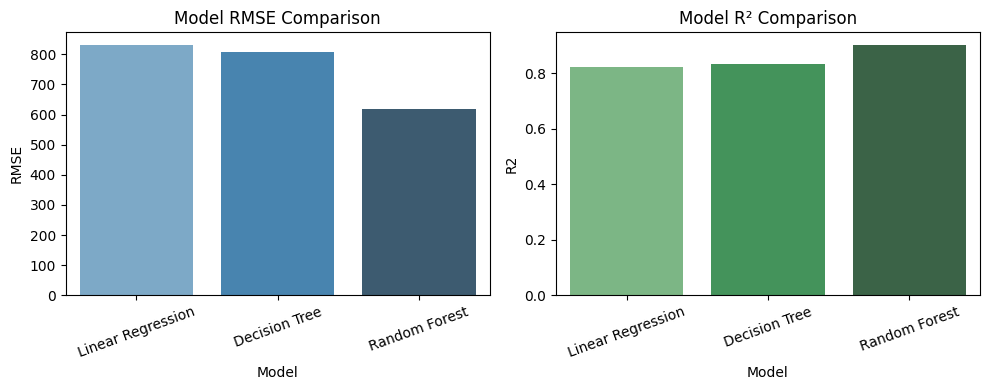

In [ ]:
# Bar plot for RMSE and R2
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R2'])
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='RMSE', data=results_df, palette='Blues_d')
plt.title('Model RMSE Comparison')
plt.xticks(rotation=20)
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2', data=results_df, palette='Greens_d')
plt.title('Model R² Comparison')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [ ]:
# Prepare a sample future data row
sample_input = pd.DataFrame({
    'QUANTITYORDERED': [40],
    'PRICEEACH': [95.55],
    'ORDERLINENUMBER': [3],
    'MONTH_ID': [7],
    'YEAR_ID': [2025],
    'PRODUCTLINE': [label_encoders['PRODUCTLINE'].transform(['Motorcycles'])[0]],
    'DEALSIZE': [label_encoders['DEALSIZE'].transform(['Medium'])[0]]
})

# Predict with the best model
best_model = models['Random Forest']
predicted_sales = best_model.predict(sample_input)

print(f"\n📈 Predicted Sales for Sample Input: {predicted_sales[0]:.2f}")


📈 Predicted Sales for Sample Input: 4444.47
